In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from censai.data.lenses_tng import decode_all, decode_train, decode_physical_model_info
from astropy.visualization import ImageNormalize, LogStretch

In [9]:
datapath = "/home/aadam/scratch/Censai/data/lenses_TNG100_testset/"
filenames = glob.glob(os.path.join(datapath, "*.tfrecords"))
data = tf.data.TFRecordDataset(filenames).map(decode_all)
# data = tf.data.TFRecordDataset(filenames).map(decode_physical_model_info)

In [52]:
kappas = []
galaxies = []
lenses = []
einstein_radius = []
einstein_radius_init = []
rescalings = []
kappa_ids = []
ps = []
kappa_max = []
kappa_min = []
kappa_max_before_rescaling = []
kappa_var = []
kappa_mean = []
i = 0
for example in data:
    kappas.append(example['kappa'])
    kappa_ids.append(example['kappa id'])
    galaxies.append(example['source'])
    lenses.append(example['lens'])
    einstein_radius.append(example['Einstein radius'].numpy())
    einstein_radius_init.append(example['Einstein radius before rescaling'].numpy())
    ps.append(example['power spectrum'])
    rescalings.append(example['rescaling factor'])
    kappa_max.append(np.max(example['kappa']))
    kappa_min.append(np.min(example['kappa']))
    kappa_max_before_rescaling.append(np.max(example['kappa'])/example['rescaling factor'].numpy())
    kappa_var.append(np.std(example['kappa']))
    kappa_mean.append(np.mean(example['kappa']))
    i += 1
    if i == 1000:
        break

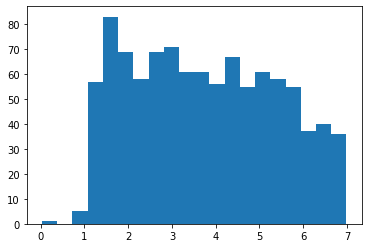

In [42]:
plt.hist(einstein_radius, bins=20);

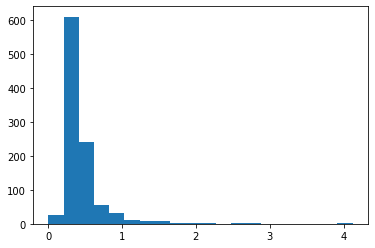

In [43]:
plt.hist(einstein_radius_init, bins=20);

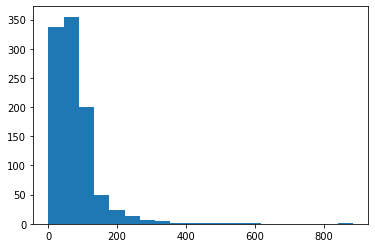

In [44]:
plt.hist(kappa_max, bins=20);
# plt.xscale("log")

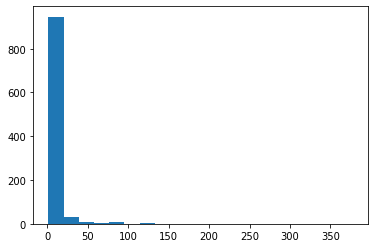

In [45]:
plt.hist(kappa_max_before_rescaling, bins=20);

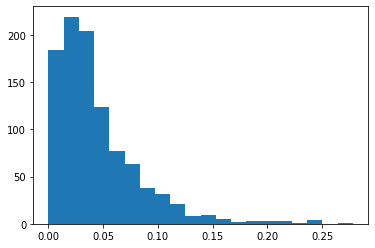

In [46]:
plt.hist(kappa_min, bins=20);

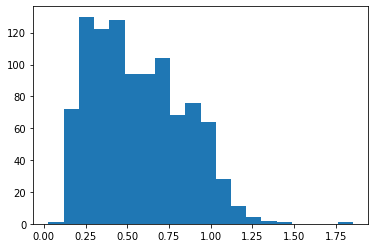

In [40]:
plt.hist(kappa_var, bins=20);
# plt.xscale("log")

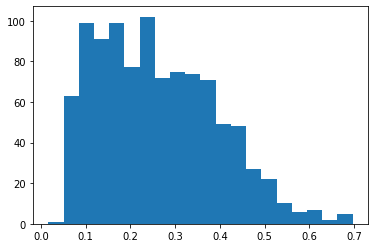

In [47]:
plt.hist(kappa_mean, bins=20);

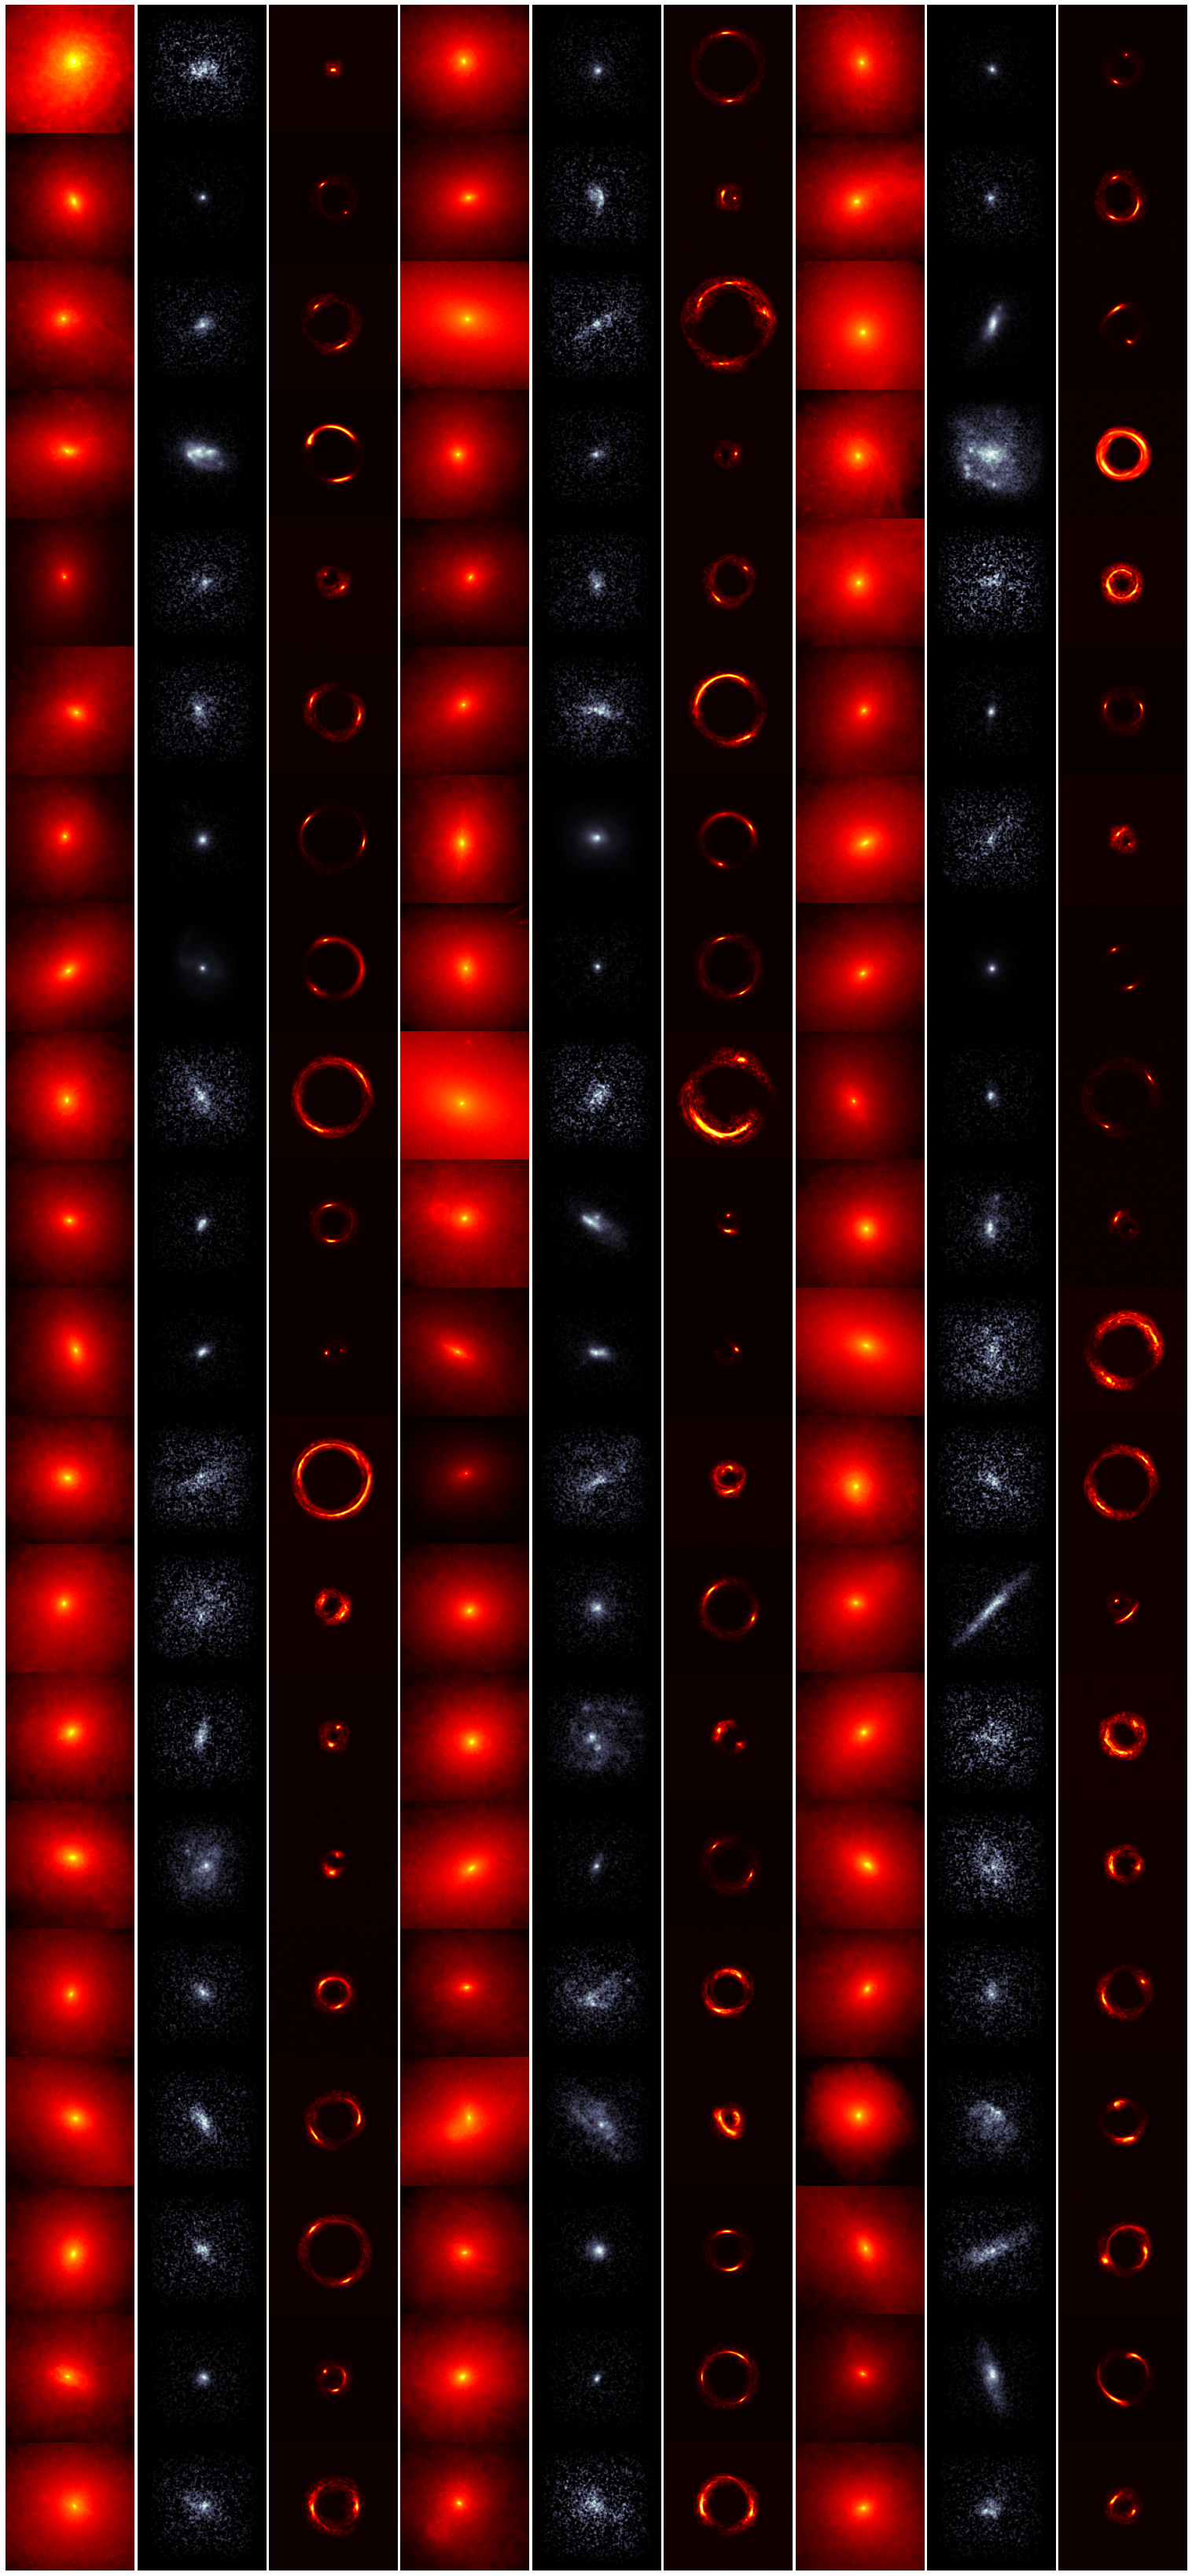

In [55]:
fig, axs = plt.subplots(20, 9, figsize=(27, 60))
start = 899
for i in range(0, 20):
    axs[i, 0].imshow(kappas[i+start][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 1].imshow(galaxies[i+start][..., 0], cmap="bone")
    axs[i, 2].imshow(lenses[i+start][..., 0], cmap="hot")
    for j in range(3):
        axs[i, j].axis("off")
        
for i in range(0, 20):
    axs[i, 3].imshow(kappas[i+start+20][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 4].imshow(galaxies[i+start+20][..., 0], cmap="bone")
    axs[i, 5].imshow(lenses[i+start+20][..., 0], cmap="hot")
    for j in range(3, 6):
        axs[i, j].axis("off")

for i in range(0, 20):
    axs[i, 6].imshow(kappas[i+start+40][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 7].imshow(galaxies[i+start+40][..., 0], cmap="bone")
    axs[i, 8].imshow(lenses[i+start+40][..., 0], cmap="hot")
    for j in range(6, 9):
        axs[i, j].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

In [53]:
kappa_ids[np.array(einstein_radius).argmin()]

<tf.Tensor: shape=(), dtype=int64, numpy=446449>

In [54]:
np.array(einstein_radius).argmin()

899